# Cargo Theft Data Examination

## I. Import and Check Out the Data

In [1]:
# Import the necessary dependencies
import pandas as pd
import numpy as np

In [2]:
# Get the Crime Report data.
df = pd.read_csv("Datasets/CrimeReport.csv")
df.head()

,data_year,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,population_group_desc,offense_code,...,location_code,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2021,Angelina,County,Texas,West South Central,ANGELINA,South,8B,"Non-MSA counties from 25,000 thru 99,999",26B,...,25,Other/Unknown,95,Unknown,20,Money,375.0,0,False,NaN
1,2021,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",23H,...,20,Residence/Home,95,Unknown,77,Other,1.0,0,False,NaN
2,2021,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",23H,...,20,Residence/Home,95,Unknown,65,Identity Documents,0.0,0,False,NaN
3,2021,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",23H,...,20,Residence/Home,95,Unknown,13,Firearms,320.0,0,False,NaN
4,2021,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",23F,...,20,Residence/Home,95,Unknown,77,Other,1.0,0,False,NaN


In [3]:
# How many different values are in each column?
df.nunique()

data_year                   9
pub_agency_name          2927
agency_type_name            8
state_name                 50
division_name              10
county_name              1227
region_name                 5
population_group_code      20
population_group_desc      20
offense_code               19
offense_name               19
offender_race               6
offender_ethnicity          4
offender_age               87
offender_sex                3
victim_type_code            9
victim_type_name            9
location_code              47
location_name              47
weapon_code                19
weapon_name                19
prop_desc_code             68
prop_desc_name             68
stolen_value             5241
recovered_value          1144
recovered_flag              2
date_recovered           2430
dtype: int64

In [4]:
# What are the counts by year?
df.data_year.value_counts()

2021    30474
2020    27092
2019    26534
2017     9191
2016     8759
2018     7498
2014     6299
2015     5103
2013     2006
Name: data_year, dtype: int64

In [5]:
# How about division?
df.division_name.value_counts()

South Atlantic        52978
East North Central    18913
New England           11660
West South Central    11555
East South Central    10320
Mountain               6043
Pacific                4229
Middle Atlantic        3748
West North Central     3498
Other                    12
Name: division_name, dtype: int64

In [6]:
# And then region?
df.region_name.value_counts()

South        74853
Midwest      22411
Northeast    15408
West         10272
Other           12
Name: region_name, dtype: int64

In [7]:
# How does division and region relate?
df.groupby(df.region_name).division_name.value_counts()

region_name  division_name     
Midwest      East North Central    18913
             West North Central     3498
Northeast    New England           11660
             Middle Atlantic        3748
Other        Other                    12
South        South Atlantic        52978
             West South Central    11555
             East South Central    10320
West         Mountain               6043
             Pacific                4229
Name: division_name, dtype: int64

In [8]:
# Which states go to which division?
df.groupby(df.division_name).state_name.value_counts()

division_name       state_name          
East North Central  Ohio                    11927
                    Michigan                 3772
                    Indiana                  1581
                    Illinois                 1350
                    Wisconsin                 283
East South Central  Tennessee                4891
                    Alabama                  3393
                    Mississippi              1232
                    Kentucky                  804
Middle Atlantic     Pennsylvania             2263
                    New Jersey               1359
                    New York                  126
Mountain            Nevada                   2308
                    New Mexico               1518
                    Colorado                 1367
                    Arizona                   278
                    Montana                   216
                    Idaho                     210
                    Utah                      138
         

In [9]:
# How many types of victims in each region?
df.groupby(df.region_name).victim_type_name.value_counts()

region_name  victim_type_name       
Midwest      Individual                 17486
             Business                    4129
             Society/Public               423
             Government                   169
             Other                         83
             Religious Organization        59
             Financial Institution         32
             Unknown                       25
             Law Enforcement Officer        5
Northeast    Individual                 12458
             Business                    2515
             Society/Public               190
             Government                   122
             Other                         54
             Financial Institution         34
             Law Enforcement Officer       19
             Religious Organization        11
             Unknown                        5
Other        Government                     8
             Individual                     4
South        Individual                 543

## II. Visualize with Plots

In [10]:
# What is the distribution of stolen values by region?
df.groupby(df.region_name).stolen_value.describe()

,count,mean,std,min,25%,50%,75%,max
region_name,,,,,,,,
Midwest,22411.0,3.059267e+03,1.808827e+04,0.0,1.0,150.0,969.5,1088949.0
Northeast,15408.0,2.863554e+03,1.556675e+04,0.0,15.0,200.0,895.0,538325.0
Other,12.0,1.000386e+06,1.476813e+06,1.0,60.0,550.0,3000000.0,3000000.0
South,74853.0,1.826715e+04,1.538036e+06,0.0,25.0,300.0,1500.0,311128346.0
West,10272.0,4.585748e+03,2.486198e+04,0.0,10.0,290.0,1500.0,999999.0


Midwest           AxesSubplot(0.1,0.679412;0.363636x0.220588)
Northeast    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
Other             AxesSubplot(0.1,0.414706;0.363636x0.220588)
South        AxesSubplot(0.536364,0.414706;0.363636x0.220588)
West                  AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

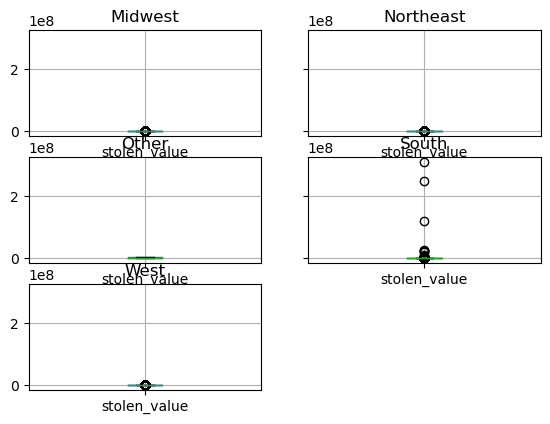

In [11]:
# Visualize this.
df.groupby("region_name").boxplot(column = "stolen_value")

In [12]:
# There are outliers, and they are definitely a problem.
# Find them.
df.loc[df.stolen_value >= 10000000]

,data_year,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,population_group_desc,offense_code,...,location_code,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
5689,2021,Gadsden,City,Alabama,East South Central,ETOWAH,South,4,"Cities from 25,000 thru 49,999",26B,...,14,Hotel/Motel/Etc.,95,Unknown,20,Money,311128346.0,0,False,NaN
9181,2021,Mobile,City,Alabama,East South Central,MOBILE,South,2,"Cities from 100,000 thru 249,999",220,...,20,Residence/Home,95,Unknown,77,Other,25496498.0,0,False,NaN
19801,2021,Mobile,City,Alabama,East South Central,MOBILE,South,2,"Cities from 100,000 thru 249,999",23H,...,25,Other/Unknown,95,Unknown,43,Building Materials,20400000.0,0,False,NaN
52640,2020,Kirby,City,Texas,West South Central,BEXAR,South,6,"Cities from 2,500 thru 9,999",240,...,20,Residence/Home,90,Other,3,Automobile,25000000.0,0,False,NaN
52641,2020,Kirby,City,Texas,West South Central,BEXAR,South,6,"Cities from 2,500 thru 9,999",240,...,20,Residence/Home,90,Other,3,Automobile,25000000.0,0,False,NaN
52642,2020,Kirby,City,Texas,West South Central,BEXAR,South,6,"Cities from 2,500 thru 9,999",240,...,20,Residence/Home,90,Other,3,Automobile,25000000.0,0,False,NaN
58165,2019,Orange,County,Florida,South Atlantic,ORANGE,South,9A,"MSA counties 100,000 or over",240,...,45,Dock/Wharf/Freight/Modal Terminal,95,Unknown,27,Recordings,120029400.0,0,False,NaN
121914,2013,Franklin,County,Mississippi,East South Central,FRANKLIN,South,8D,"Non-MSA counties under 10,000",120,...,18,Parking/Drop Lot/Garage,11,Firearm,64,Fuel,250000000.0,150000,True,2013-01-25


Midwest           AxesSubplot(0.1,0.679412;0.363636x0.220588)
Northeast    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
Other             AxesSubplot(0.1,0.414706;0.363636x0.220588)
South        AxesSubplot(0.536364,0.414706;0.363636x0.220588)
West                  AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

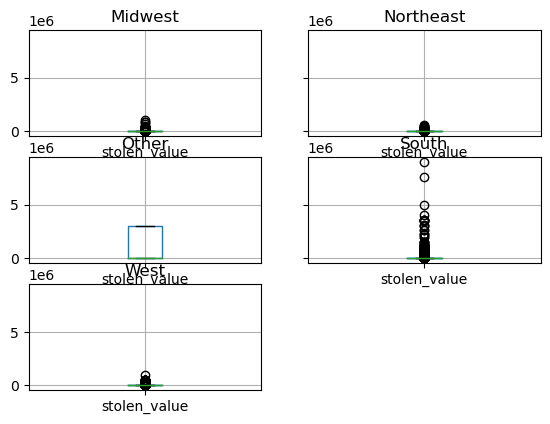

In [13]:
# What if these were gone?
df1 = df.loc[df.stolen_value <=10000000]
df1.groupby("region_name").boxplot(column = "stolen_value")